In [768]:
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.stats import chisquare
Path.cwd()

PosixPath('/home/francesco/FisMedLab/Silici/Secondo Giorno/siliciGiorno2')

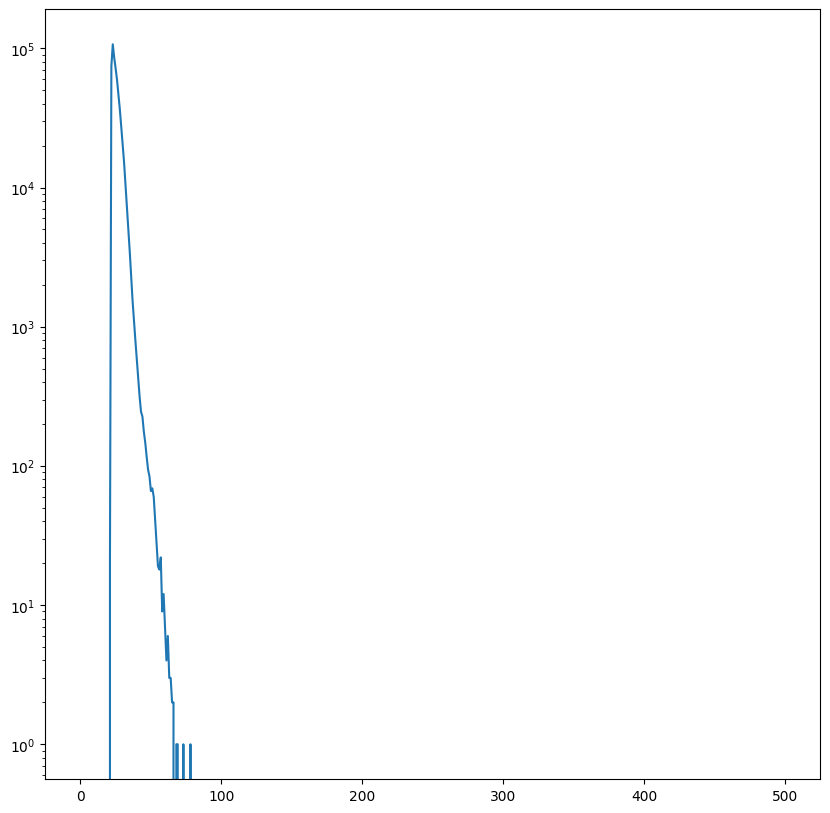

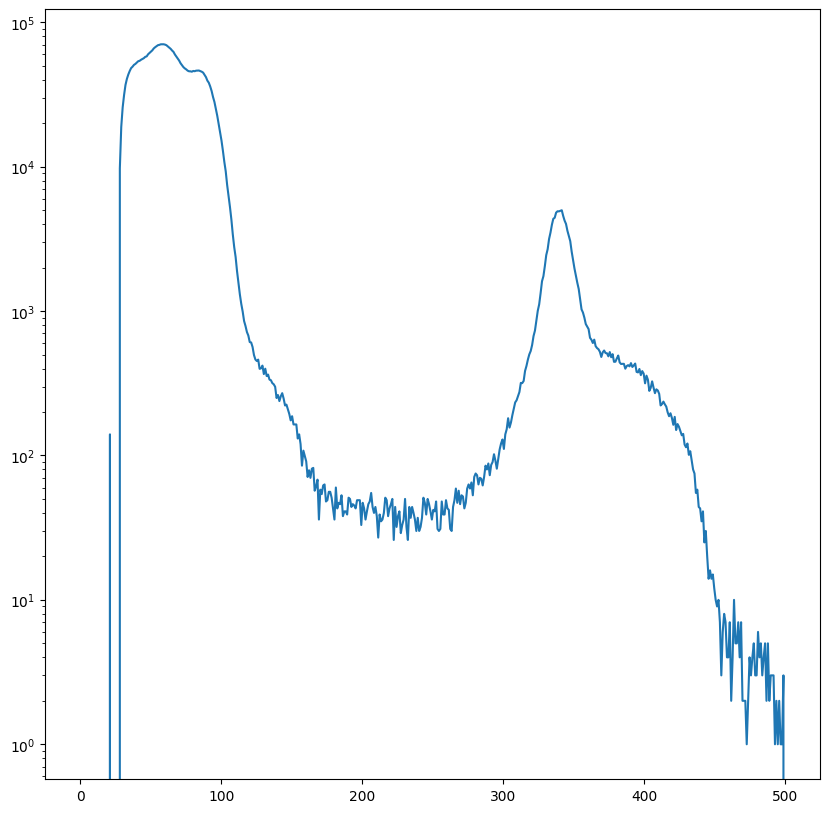

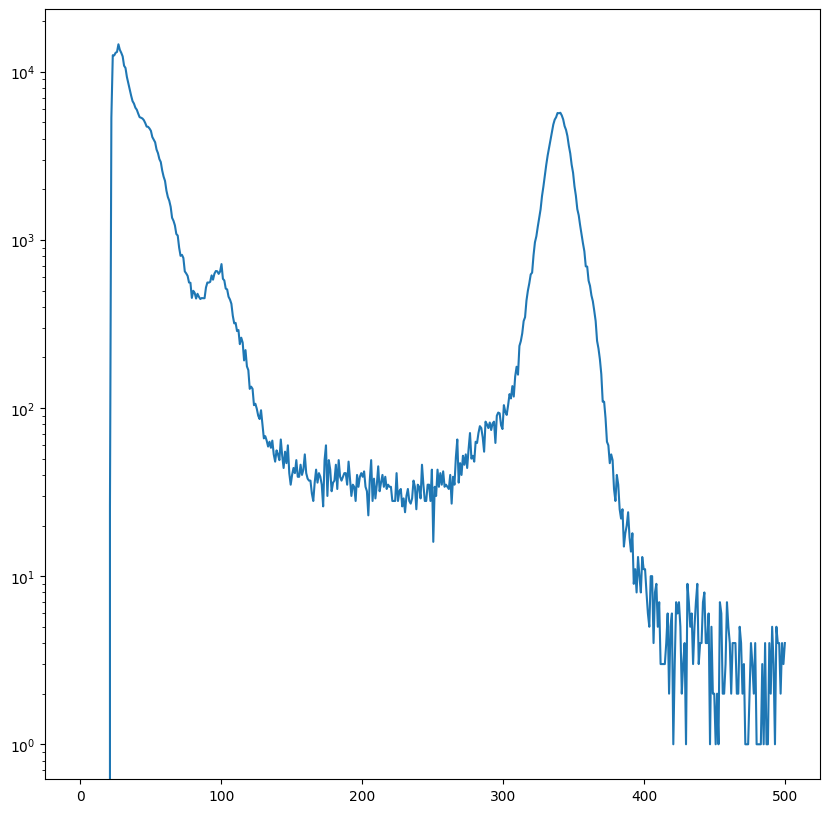

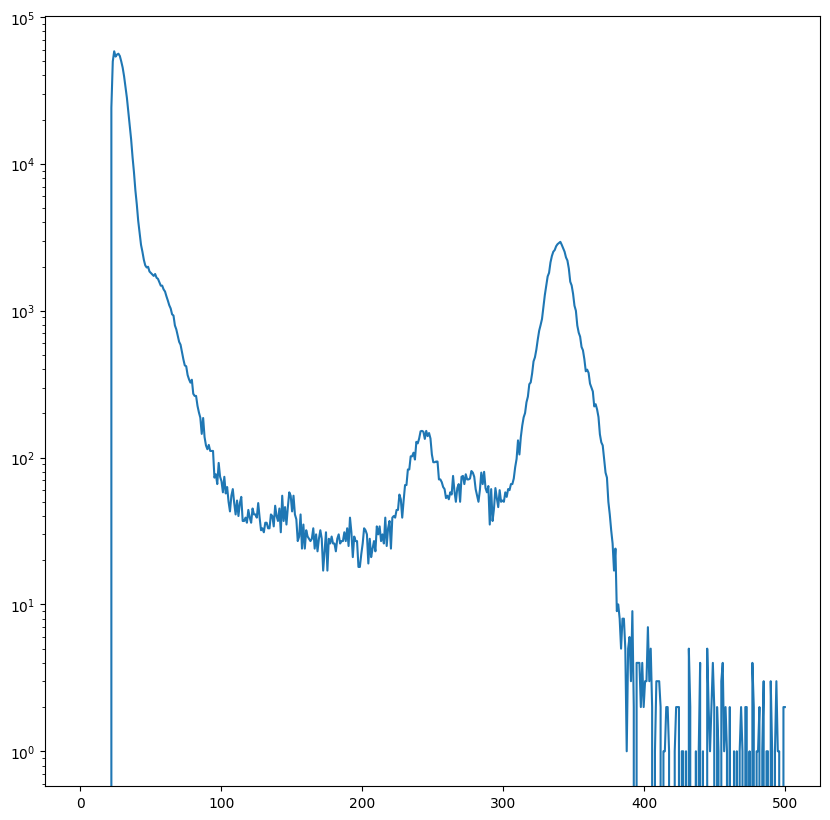

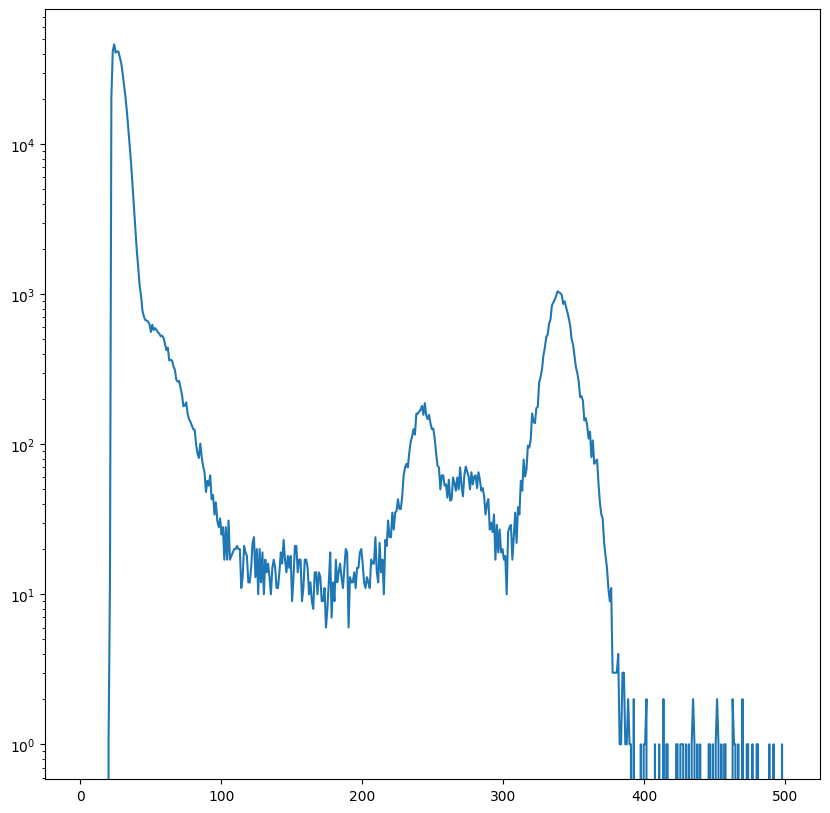

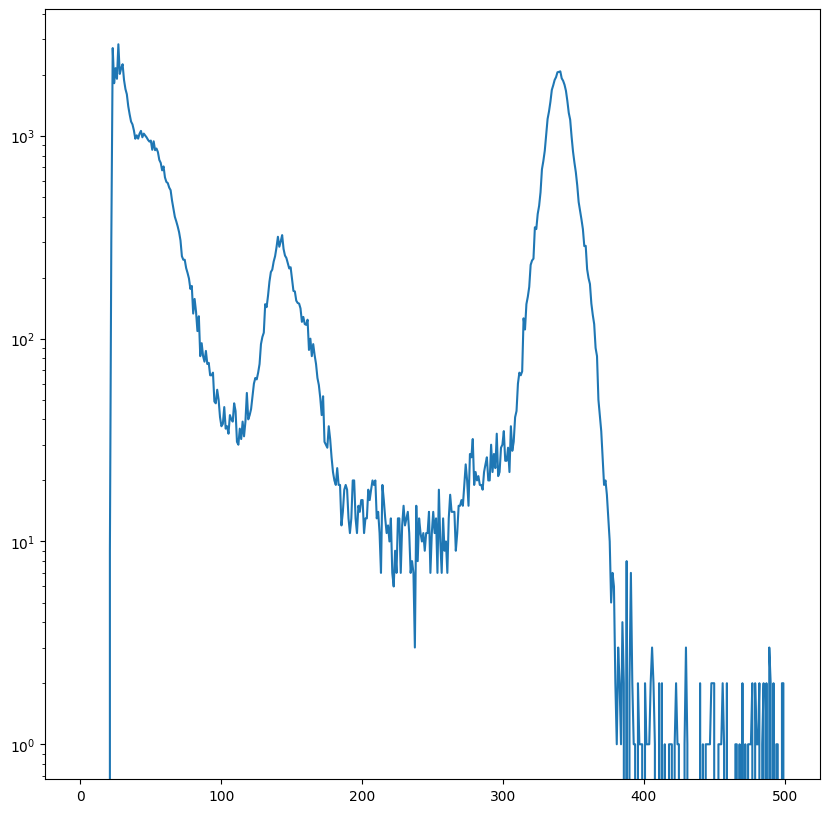

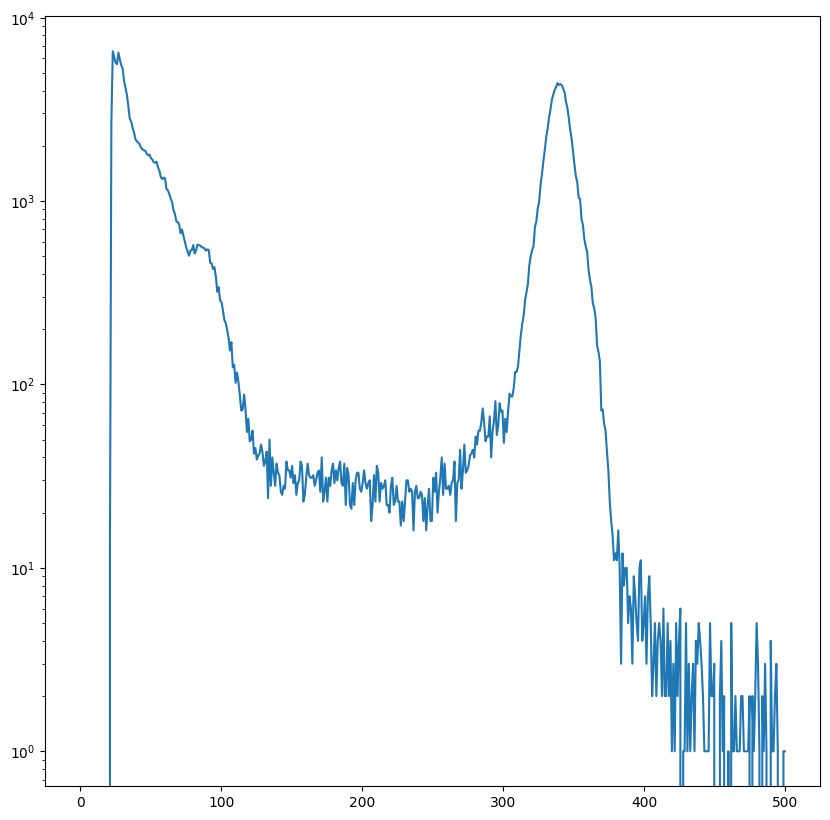

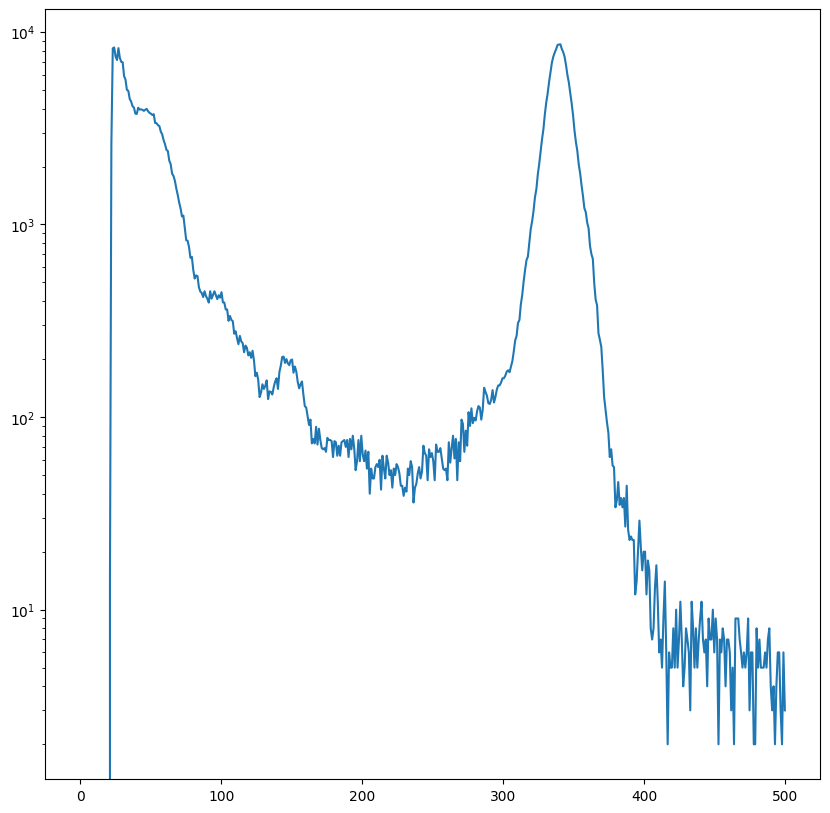

In [769]:
Pb= np.loadtxt('Am241_12V_180s_50micronPb82.Spe')
Mo= np.loadtxt('Am241_12V_180s_100micronMo42.Spe')
Gd1= np.loadtxt('Am241_12V_180s_120micronGd64.Spe')
Gd2= np.loadtxt('Am241_12V_180s_240micronGd64.Spe')
Sn= np.loadtxt('Am241_12V_180s_250micronSn50.Spe')
Zr= np.loadtxt('Am241_12V_180s_250micronZr40.Spe')
Am= np.loadtxt('Am241_12V_180s.Spe')
noise=np.loadtxt('rumore12V.Spe')

x=np.linspace(0,500,500)
plt.yscale('log')

plt.plot(x,noise[0:500])
plt.show()
plt.yscale('log')

plt.plot(x,Pb[0:500]-noise[0:500])
plt.show()
plt.yscale('log')

Mo[0:500]=Mo[0:500]-noise[0:500]
plt.plot(x,Mo[0:500])
plt.show()
plt.yscale('log')

plt.plot(x,Gd1[0:500]-noise[0:500])
plt.show()
plt.yscale('log')

plt.plot(x,Gd2[0:500]-noise[0:500])
plt.show()
plt.yscale('log')

plt.plot(x,Sn[0:500]-noise[0:500])
plt.show()
plt.yscale('log')

plt.plot(x,Zr[0:500]-noise[0:500])
plt.show()
plt.yscale('log')

plt.plot(x,Am[0:500]-noise[0:500])
plt.show()

E=[]
dE=[]
s=[]
ds=[]
resolution=[]

Fit picco a 59.5 keV Americio

picchi a  26,3 Americio

linee alpha insieme, linee beta insieme, linea gamma piombo 10.5,12,14

Chi-squared: 348.21
Reduced chi-squared: 3.83


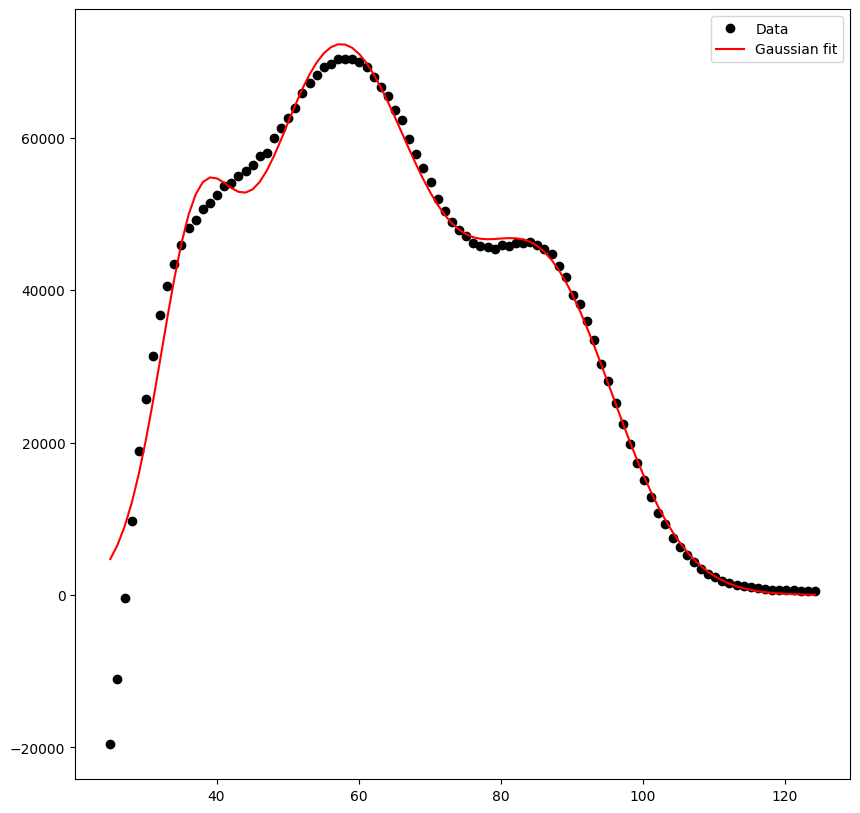

[78.57928446 65.11742509]


In [770]:

x=np.linspace(0,500,500)

# Define the sum of Gaussian functions
def gaussian_sum(x, *params):
    n = int(len(params) / 3)  # Number of Gaussians
    y = np.zeros_like(x)
    for i in range(n):
        amp = params[i * 3]
        mean = params[i * 3 + 1]
        stddev = params[i * 3 + 2]
        y += amp * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

# Load the data and create the x and y arrays
x = x[25:125]
y = Pb[25:125]-noise[25:125]

# Plot the data
plt.plot(x, y, 'ko', label='Data')

# Guess initial parameters for Gaussian fit
n_gaussians = 3  # Number of Gaussians to fit
p0 = np.zeros(n_gaussians * 3)
p0[0] = 45000  # Amplitude of first Gaussian
p0[1] = 30  # Mean of first Gaussian
p0[2] = 27  # Std. dev. of first Gaussian
p0[3] = 75000  # Amplitude of second Gaussian
p0[4] = 58  # Mean of second Gaussian
p0[5] = 30  # Std. dev. of second Gaussian
p0[6] = 42000  # Amplitude of third Gaussian
p0[7] = 100  # Mean of third Gaussian
p0[8] = 10  # Std. dev. of third Gaussian

# Fit the sum of Gaussians to the data using curve_fit
coeff, var_matrix = curve_fit(gaussian_sum, x, y, p0=p0)
fit_y = gaussian_sum(x, *coeff)
plt.plot(x, fit_y, 'r-', label='Gaussian fit')
E=np.append(E,[coeff[4],coeff[7]])
dE=np.append(dE,[np.sqrt(var_matrix[4,4]),np.sqrt(var_matrix[7,7])])
ds=np.append(ds,[np.sqrt(var_matrix[5,5]),np.sqrt(var_matrix[8,8])])
s=np.append(s,[coeff[5],coeff[8]])

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Add a legend and show the plot
plt.legend()
plt.show()
'''
# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[2])
resolution =np.append( resolution,fwhm / coeff[1] * 100)  # Convert to percentage
'''
# Calculate the energy resolution (FWHM) of the peak
fwhm = 2.35* abs(coeff[5])
resolution =np.append( resolution,fwhm / coeff[1] * 100)  # Convert to percentage

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2.35* abs(coeff[8])
resolution =np.append( resolution,fwhm / coeff[1] * 100)  # Convert to percentage

print(resolution)



Chi-squared: 19.20
Reduced chi-squared: 0.43
[78.57928446 65.11742509 26.25088571]


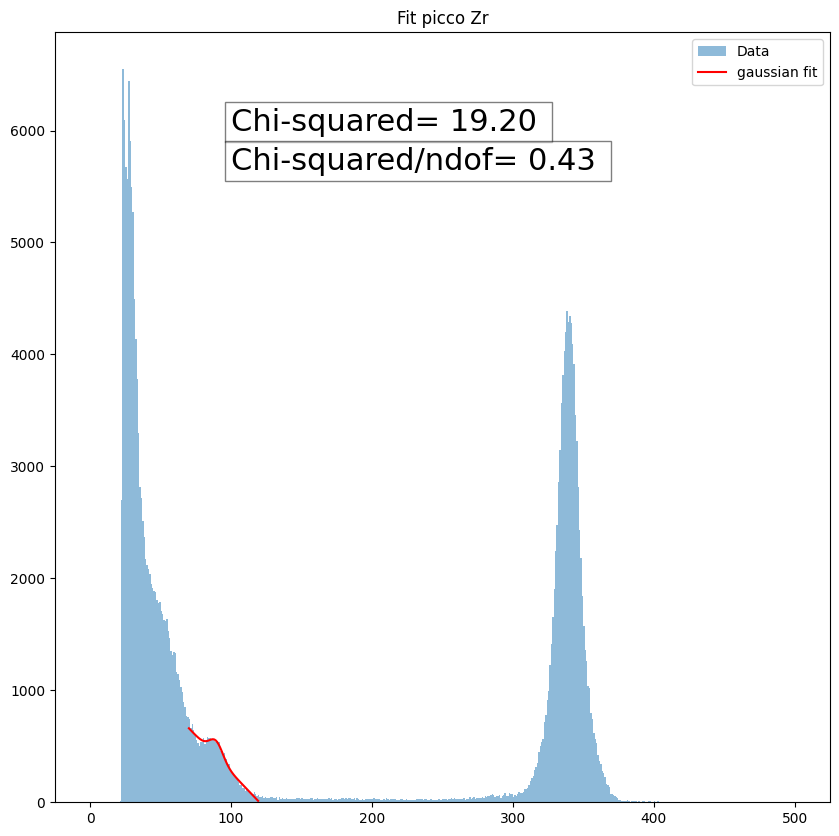

In [771]:
def lorentzian2(x, amplitude, mean, stddev,m,b):
    return amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))-m*x+b

def lorentzian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2) )


# Load the data and create the x and y arrays
x=np.linspace(0,500,500)

y = Zr[70:120]-noise[70:120]
x1 = x[70:120]


# Plot the data
plt.title('Fit picco Zr')
plt.hist(x,weights= Zr[0:500]-noise[0:500], label='Data',alpha=0.5,bins=500)

# Fit the lorentzian to the data using curve_fit

p0 = [600, 90, 10,10,1000]  # Initial guesses for amplitude, mean, and stddev
coeff, var_matrix = curve_fit(lorentzian2, x1, y, p0=p0)
fit_y = lorentzian2(x1, *coeff)
plt.plot(x1, fit_y, 'r-', label='gaussian fit')
#plt.plot(x1, lorentzian(x1, *coeff[0:3]), 'g--', label='gaussian') 

E=np.append(E,[coeff[1]])
dE=np.append(dE,[np.sqrt(var_matrix[1,1])])
ds=np.append(ds,[np.sqrt(var_matrix[2,2])])
s=np.append(s,[coeff[2]])


# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x1) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Calculate the energy resolution (FWHM) of the peak
fwhm1 =  (10*2.35)
resolution = np.append(resolution,[(fwhm1/ coeff[1]) * 100])  # Convert to percentage

print(resolution)
plt.text(100, 6000, 'Chi-squared= {:.2f} '.format(chi2), fontsize=22, bbox=dict(facecolor='white', alpha=0.5))
plt.text(100, 5650, 'Chi-squared/ndof= {:.2f} '.format(reduced_chi2), fontsize=22, bbox=dict(facecolor='white', alpha=0.5))



# Add a legend and show the plot
plt.legend()
plt.show()

linee k alpha insieme, linea beta1 MOli. Qua mi sa che ho fittato il rumore

LInee MO  18.1

5.341567046632392
Chi-squared: 0.74
Reduced chi-squared: 0.01
[78.57928446 65.11742509 26.25088571 35.38721146]


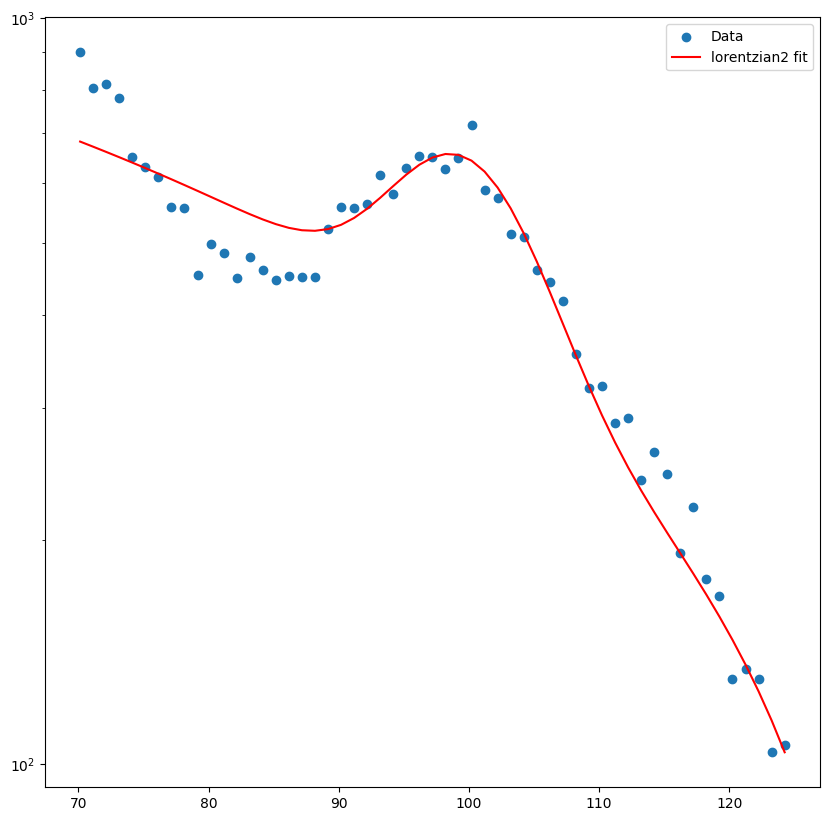

In [772]:
def lorentzian2(x, amplitude, mean, stddev,m,b):
    return (amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2)))-m*x+b

plt.yscale('log')

# Load the data and create the x and y arrays
x=np.linspace(0,500,500)

y = Mo[70:125]
x1 = x[70:125]

# Plot the data
plt.scatter(x1, y, label='Data')

# Fit the lorentzian to the data using curve_fit
p0 = [100, 99, 5,50,5000]  # Initial guesses for amplitude, mean, and stddev
coeff, var_matrix = curve_fit(lorentzian2, x1, y, p0=p0)

E=np.append(E,coeff[1])
dE=np.append(dE,np.sqrt(var_matrix[1,1]))
ds=np.append(ds,np.sqrt(var_matrix[2,2]))
s=np.append(s,coeff[2])


fit_y = lorentzian2(x1, *coeff)
plt.plot(x1, fit_y, 'r-', label='lorentzian2 fit')
#plt.plot(x1, lorentzian(x1, *coeff[0:3]), 'g--', label='lorentzian')
print(coeff[2])

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x1) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Calculate the energy resolution (FWHM) of the peak
fwhm = 15*2.35
resolution = np.append(resolution,fwhm / coeff[1] * 100)  # Convert to percentage

print(resolution)

# Add a legend and show the plot
plt.legend()
plt.show()


Chi-squared: 402.02
Reduced chi-squared: 5.43
[78.57928446 65.11742509 26.25088571 35.38721146  9.33790098 27.89809484]


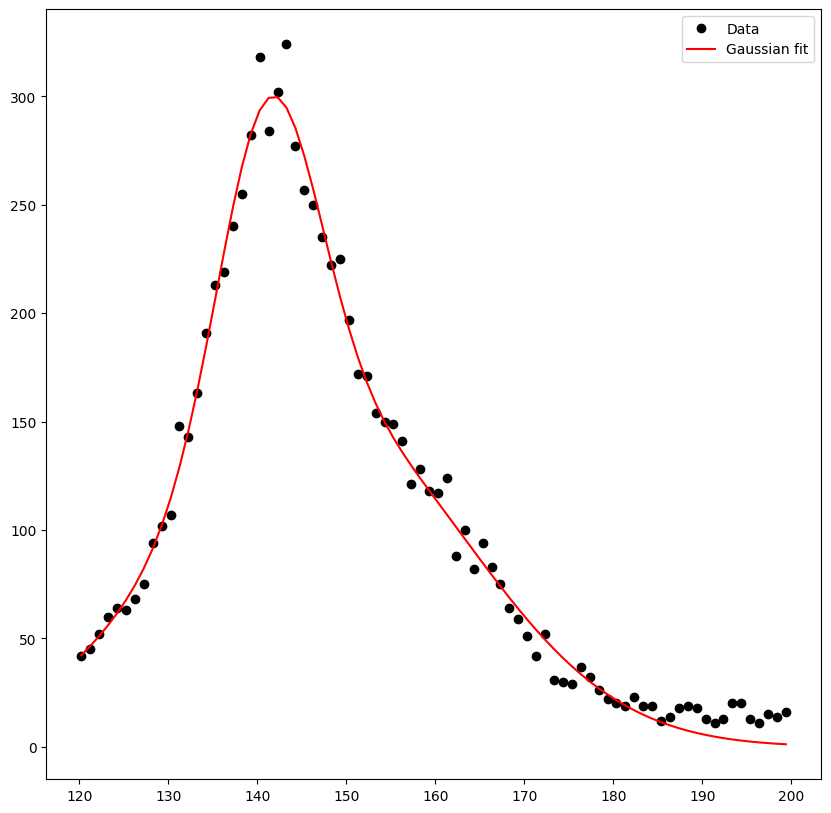

In [773]:
x=np.linspace(0,500,500)

# Load the data and create the x and y arrays
x = x[120:200]
y = Sn[120:200]-noise[120:200]

# Plot the data
plt.plot(x, y, 'ko', label='Data')

# Guess initial parameters for Gaussian fit
n_gaussians = 2  # Number of Gaussians to fit
p0 = np.zeros(n_gaussians * 3)
p0[0] = 300  # Amplitude of first Gaussian
p0[1] = 142  # Mean of first Gaussian
p0[2] = 10  # Std. dev. of first Gaussian
p0[3] = 130  # Amplitude of second Gaussian
p0[4] = 162  # Mean of second Gaussian
p0[5] = 20  # Std. dev. of second Gaussian


# Fit the sum of Gaussians to the data using curve_fit
coeff, var_matrix = curve_fit(gaussian_sum, x, y, p0=p0)
E=np.append(E,[coeff[1],coeff[4]])
dE=np.append(dE,[np.sqrt(var_matrix[1,1]),np.sqrt(var_matrix[4,4])])
ds=np.append(ds,[np.sqrt(var_matrix[2,2]),np.sqrt(var_matrix[5,5])])
s=np.append(s,[coeff[2],coeff[5]])

fit_y = gaussian_sum(x, *coeff)
plt.plot(x, fit_y, 'r-', label='Gaussian fit')

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2.35*abs(coeff[2])
resolution = np.append(resolution,fwhm / coeff[1] * 100 ) # Convert to percentage

# Calculate the energy resolution (FWHM) of the peak
fwhm =  2.35*abs(coeff[5])
resolution = np.append(resolution,fwhm / coeff[1] * 100 ) # Convert to percentage

print(resolution)


# Add a legend and show the plot
plt.legend()
plt.show()

Chi-squared: 1.37
Reduced chi-squared: 0.02
[78.57928446 65.11742509 26.25088571 35.38721146  9.33790098 27.89809484
  8.37487596]


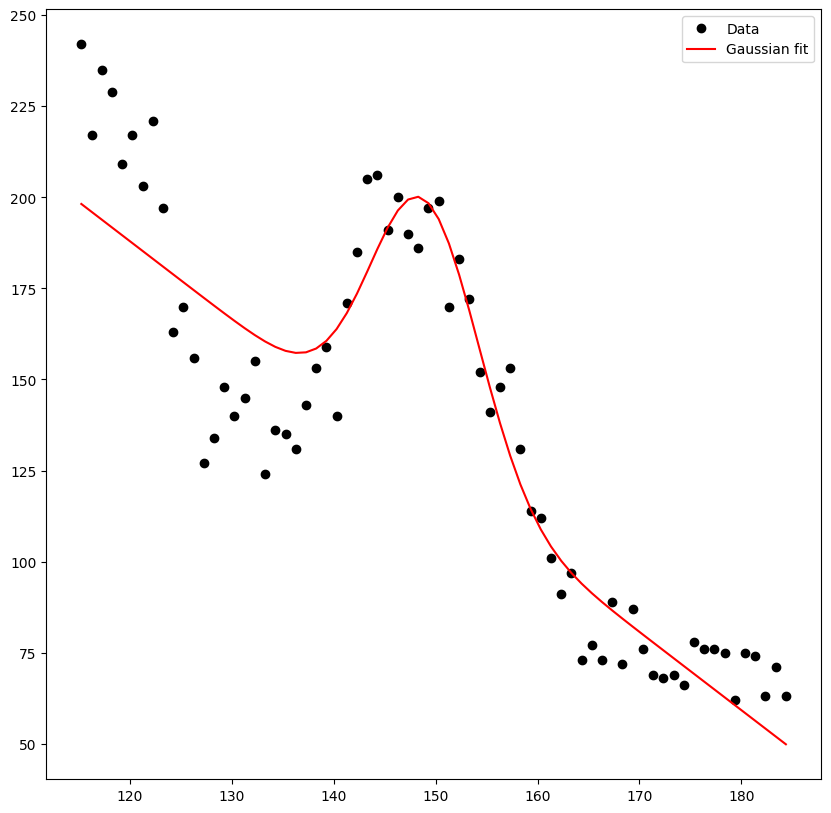

In [774]:
x=np.linspace(0,500,500)

# Define the sum of Gaussian functions
def gaussian_sum(x, *params):
    n = int(len(params) / 3)  # Number of Gaussians
    y = np.zeros_like(x)
    for i in range(n):
        amp = params[i * 3]
        mean = params[i * 3 + 1]
        stddev = params[i * 3 + 2]
        y += amp * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y


def lorentzian2(x, amplitude, mean, stddev,m,b):
    return (amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2)))-m*x+b

# Load the data and create the x and y arrays
x = x[115:185]
y = Am[115:185]-noise[115:185]

# Plot the data
plt.plot(x, y, 'ko', label='Data')

# Guess initial parameters for Gaussian fit
n_gaussians = 1  # Number of Gaussians to fit
p0 = np.zeros(5)
p0[0] = 200  # Amplitude of first Gaussian
p0[1] = 150  # Mean of first Gaussian
p0[2] = 10# Std. dev. of first Gaussian
p0[3]= -1000
p0[4]= -10000


# Fit the sum of Gaussians to the data using curve_fit
coeff, var_matrix = curve_fit(lorentzian2, x, y, p0=p0)
fit_y = lorentzian2(x, *coeff)

plt.plot(x, fit_y, 'r-', label='Gaussian fit')

E=np.append(E,[coeff[1]])
dE=np.append(dE,[np.sqrt(var_matrix[1,1])])
ds=np.append(ds,[np.sqrt(var_matrix[2,2])])
s=np.append(s,[coeff[2]])

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))
# Calculate the energy resolution (FWHM) of the peak
fwhm = 2.35*abs(coeff[2])
resolution = np.append(resolution,fwhm / coeff[1] * 100 ) # Convert to percentage
# Add a legend and show the plot
print(resolution)

plt.legend()
plt.show()

picco gd 42.7 e backscatter Am che copre gd a 48/49

Riprovo con multigaussiano

linee k apha stagno insieme 25.2, linea k beta1 28.5

linee zirconio 16.4

Chi-squared: 2.74
Reduced chi-squared: 0.04
[78.57928446 65.11742509 26.25088571 35.38721146  9.33790098 27.89809484
  8.37487596  8.10841012 13.33037724]


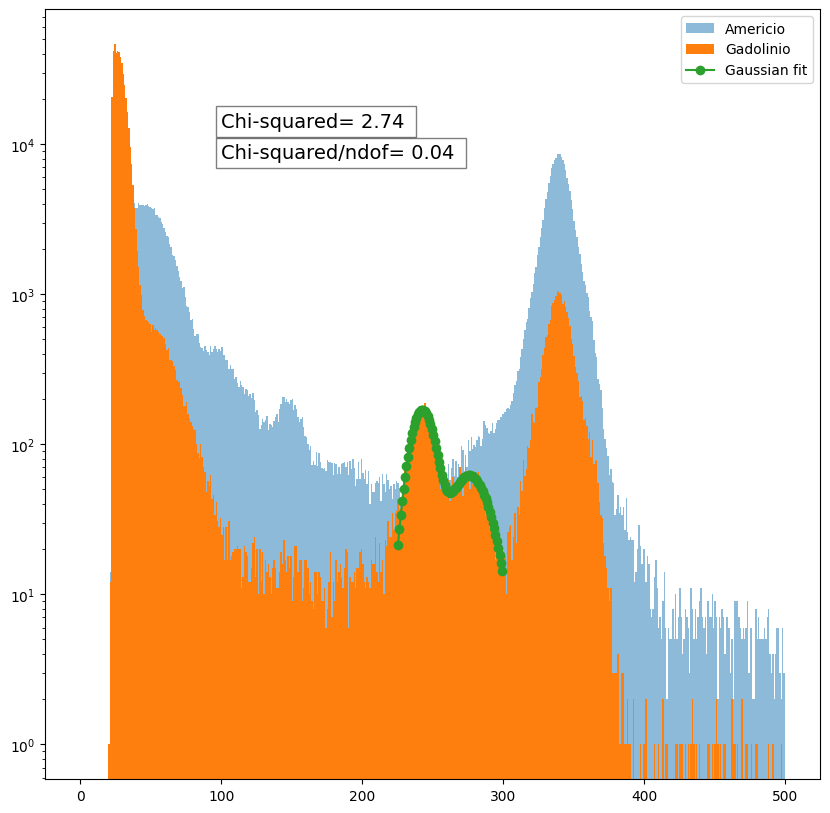

In [775]:
x=np.linspace(0,500,500)
plt.yscale('log')

# Define the sum of Gaussian functions
def gaussian_sum(x, *params):
    n = int(len(params) / 3)  # Number of Gaussians
    y = np.zeros_like(x)
    for i in range(n):
        amp = params[i * 3]
        mean = params[i * 3 + 1]
        stddev = params[i * 3 + 2]
        y += amp * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

# Load the data and create the x and y arrays
x = x[225:300]
y = Gd2[225:300]-noise[225:300]
x1=np.linspace(0,500,500)

# Plot the data
plt.hist(x1,weights=Am[0:500]-noise[0:500],bins=500, label='Americio',alpha=0.5)

plt.hist(x1, weights=(Gd2[0:500]-noise[0:500]),bins=500, label='Gadolinio',alpha=1)

# Guess initial parameters for Gaussian fit
n_gaussians = 2  # Number of Gaussians to fit
p0 = np.zeros(n_gaussians * 3)
p0[0] = 175  # Amplitude of first Gaussian
p0[1] = 240  # Mean of first Gaussian
p0[2] = 20  # Std. dev. of first Gaussian
p0[3] = 75  # Amplitude of second Gaussian
p0[4] = 280  # Mean of second Gaussian
p0[5] = 10  # Std. dev. of second Gaussian


# Fit the sum of Gaussians to the data using curve_fit
coeff, var_matrix = curve_fit(gaussian_sum, x, y, p0=p0)
fit_y = gaussian_sum(x, *coeff)
plt.plot(x, fit_y, 'o-', label='Gaussian fit')

E=np.append(E,[coeff[1],coeff[4]])
dE=np.append(dE,[np.sqrt(var_matrix[1,1]),np.sqrt(var_matrix[4,4])])
ds=np.append(ds,[np.sqrt(var_matrix[2,2]),np.sqrt(var_matrix[5,5])])
s=np.append(s,[coeff[2],coeff[5]])

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))


# Calculate the energy resolution (FWHM) of the peak
fwhm = 2.35* abs(coeff[2])
resolution = np.append(resolution,fwhm / coeff[1] * 100)  # Convert to percentage

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2.35*abs(coeff[5])
resolution = np.append(resolution,fwhm / coeff[1] * 100 ) # Convert to percentage

print(resolution)



plt.text(100, 13000, 'Chi-squared= {:.2f} '.format(chi2), fontsize=14, bbox=dict(facecolor='white', alpha=0.5))
plt.text(100, 8000, 'Chi-squared/ndof= {:.2f} '.format(reduced_chi2), fontsize=14, bbox=dict(facecolor='white', alpha=0.5))


# Add a legend and show the plot
plt.legend()
plt.show()

Chi-squared: 46.71
Reduced chi-squared: 0.32
[78.57928446 65.11742509 26.25088571 35.38721146  9.33790098 27.89809484
  8.37487596  8.10841012 13.33037724  2.39821095]


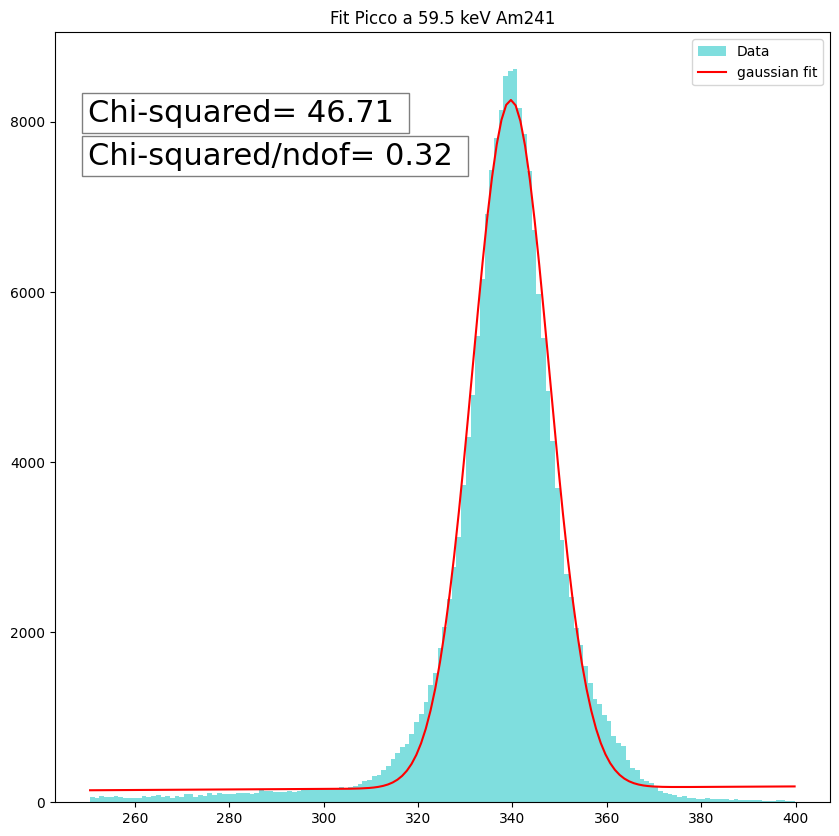

In [776]:
x=np.linspace(0,500,500)

# Define the gaussian function
def gaussian(x, amplitude, mean, stddev,m,b):
    return amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))+m*x+b

# Load the data and create the x and y arrays
y = Am[250:400]
x1 = x[250:400]

# Plot the data
#plt.markersize=15  
#plt.scatter(x1, y, label='Data',marker='s')
plt.title('Fit Picco a 59.5 keV Am241')
plt.hist(x1, weights=y, bins=150, label='Data',color='c',alpha=0.5)

# Fit the gaussian to the data using curve_fit
p0 = [9000, 340, 20,0,6]  # Initial guesses for amplitude, mean, and stddev
coeff, var_matrix = curve_fit(gaussian, x1, y, p0=p0)



E=np.append(E,coeff[1])
dE=np.append(dE,np.sqrt(var_matrix[1,1]))
ds=np.append(ds,np.sqrt(var_matrix[2,2]))
s=np.append(s,coeff[2])

fit_y = gaussian(x1, *coeff)
plt.plot(x1, fit_y, '-', label='gaussian fit',color='r')


# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x1) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))
plt.text(250, 8000, 'Chi-squared= {:.2f} '.format(chi2), fontsize=22, bbox=dict(facecolor='white', alpha=0.5))
plt.text(250, 7500, 'Chi-squared/ndof= {:.2f} '.format(reduced_chi2), fontsize=22, bbox=dict(facecolor='white', alpha=0.5))



# Calculate the energy resolution (FWHM) of the peak
fwhm =  abs(coeff[2])
resolution = np.append(resolution,fwhm / coeff[1] * 100 ) # Convert to percentage
print(resolution)
# Add a legend and show the plot
plt.legend()
plt.show()

[ 57.06426762  85.99337522  89.52078896  99.61225693 141.29348757
 148.94248218 147.1598895  242.39590876 276.03159613 339.65212891]
[12.29527386 10.18890131 -4.76501647  5.34156705  5.61440254 16.77369837
  5.30797793  8.36359762 13.74991024  8.14557456]
Risoluzione:   [78.57928446 65.11742509 26.25088571 35.38721146  9.33790098 27.89809484
  8.37487596  8.10841012 13.33037724  2.39821095]
[0.17088558 1.45553284]
[0.00338686 0.62698559]


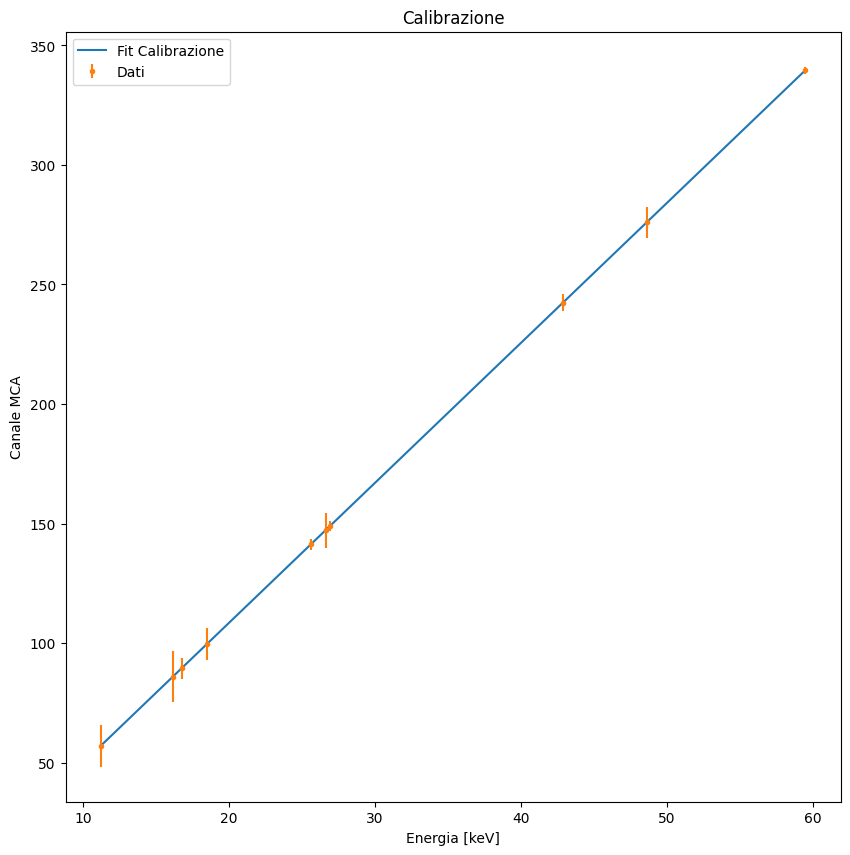

Chi-squared: 0.03
Reduced chi-squared: 0.00
Energia Calibrata :  [11.20699303 16.15056023 16.75334435 18.47783066 25.60055174 26.6030352
 26.90765458 42.87749714 48.62535092 59.49718226]
Errore Energia Calibrata:   [ 8.80637493 10.51682896  4.39790128  6.53878901  2.39055417  7.42173999
  2.2534827   3.47668332  6.48194271  1.42686794]
Errore Risoluzione :  [8.88151473 5.25147298 3.2532732  4.32580341 0.44063185 0.72722106
 1.11538657 0.22140214 0.95799368 0.02239873]


In [777]:
keV=[12.6,14.7,16.4,18.1,25.2,26.3,28.5,42.7,48.7,59.5]
x=np.linspace(0,500,500)

E[5],E[6]=E[6],E[5]
print(E)
print(s)
errRes=resolution*np.sqrt((dE/E)**2+(ds/s)**2)
print('Risoluzione:  ',resolution)


R_E=resolution/100

E=np.sort(E,)
s=np.sort(s)
s=abs(s)


def linear(x,m,q):
    return m*x+q




popt,cov=curve_fit(linear,E,keV,absolute_sigma=False) 
print(popt)
print(np.sqrt(np.diag(cov)))

plt.title('Calibrazione')

plt.plot(linear(E,*popt),E,label='Fit Calibrazione')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Energia [keV]')
plt.ylabel('Canale MCA')

plt.errorbar(linear(E,*popt),E,yerr=R_E*linear(E,*popt),fmt='.',label='Dati')
plt.legend()
plt.show()


# Calculate the chi-squared value
residuals = keV - linear(E,*popt)
chi2 = np.sum((residuals / linear(E,*popt)) ** 2)
dof = len(x1) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

print('Energia Calibrata : ',linear(E,*popt))
print('Errore Energia Calibrata:  ',R_E*linear(E,*popt))

print('Errore Risoluzione : ',errRes)



In [778]:
resolution=resolution/100

E=E*1e3


Fano Factor: 0.17568555538097855
0.5195032117641161


/tmp/ipykernel_251660/1617925480.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(d * (3.62) /( 0.2*x)) * 2.35 +b


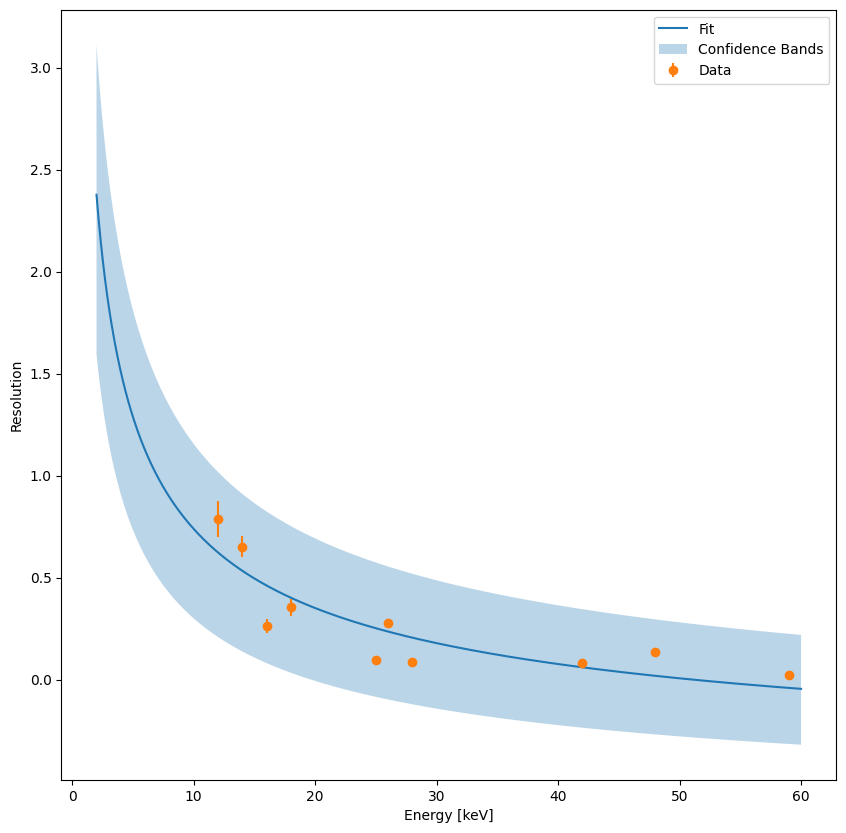

Chi-squared: 43.53
Reduced chi-squared: 5.44
Fit values: [ 0.62309803  0.53336118  0.4610264   0.40111043  0.25149689  0.23522121
  0.20532596  0.06000097  0.01823846 -0.04105276]


In [780]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def funcris(x, d,b):
    return np.sqrt(d * (3.62) /( 0.2*x)) * 2.35 +b

keV = np.array(keV, dtype=int)

# Fit the function to the data
popt2, covt = curve_fit(funcris, keV, resolution, absolute_sigma=True, p0=[0.1 * 8.15 * 1e-2,0])

F = popt2[0]

print('Fano Factor:', F
)

print(np.sqrt(covt[0,0]))

# Generate confidence bands using bootstrapping
n_bootstrap = 1000  # Number of bootstrap samples
n_points = len(keV)  # Number of data points

bootstrap_params = np.zeros((n_bootstrap, len(popt2)))

for i in range(n_bootstrap):
    # Randomly sample with replacement from the data
    indices = np.random.choice(np.arange(n_points), size=n_points, replace=True)
    bootstrap_data = keV[indices]
    bootstrap_res = resolution[indices]
    
    # Fit the function to the bootstrap sample
    bootstrap_params[i], _ = curve_fit(funcris, bootstrap_data, bootstrap_res, absolute_sigma=True, p0=popt2)

# Calculate confidence intervals from the bootstrap samples
lower_bound = np.percentile(bootstrap_params, 16, axis=0)
upper_bound = np.percentile(bootstrap_params, 84, axis=0)

# Plot the results
x = np.linspace(2, 60, 1000)
plt.plot(x, funcris(x, *popt2), label='Fit')
plt.fill_between(x, funcris(x, *lower_bound), funcris(x, *upper_bound), alpha=0.3, label='Confidence Bands')
plt.errorbar(keV, resolution,yerr=errRes/100, fmt='o', label='Data')
plt.xlabel('Energy [keV]')
plt.ylabel('Resolution')
plt.legend()
plt.show()


# Calculate the chi-squared value
residuals = resolution - funcris(keV, *popt2)
chi2 = np.sum((residuals / funcris(keV, *popt2)) ** 2)
dof = len(keV) - len(popt2)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))
print('Fit values:', funcris(keV, *popt2))
